<a href="https://colab.research.google.com/github/jamesliudotcc/fast_ai/blob/main/Build_a_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/home/james/.fastai/data/mnist_sample/valid'),Path('/home/james/.fastai/data/mnist_sample/train'),Path('/home/james/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/"train").ls()

(#2) [Path('/home/james/.fastai/data/mnist_sample/train/3'),Path('/home/james/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/"train"/"3").ls().sorted()
sevens = (path/"train"/"7").ls().sorted()

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)  # Image is PIL.Image
im3

In [8]:
array(im3)[:, 8:-8] # whole height, truncate the width to fit.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
       [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
       [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
       [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
       [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
       [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
       [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
       [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
       [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
       [  0,   0,   0,  43,  98,  

In [9]:
tensor(im3)[:, 8:-8] # whole height, truncate the width to fit.

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
        [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
        [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
        [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
        [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
        [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
        [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
        [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
        [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
        [  0,   0,  

In [10]:
seven_tensors = [tensor(Image.open(f)) for f in sevens]
three_tensors = [tensor(Image.open(f)) for f in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

I gave the following some thought, why would it work to .float() and /255? Because of broadcasting. If you apply a method like float that works on individual numbers, or do an arithmetic operation, it broadcasts. Ok, that was tripping me up. 

In [11]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

(<Axes: >, <Axes: >)

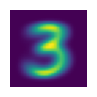

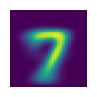

In [12]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3),show_image(mean7)

<Axes: >

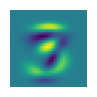

In [13]:
show_image(mean3-mean7)

<Axes: >

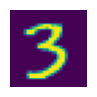

In [14]:
a_3 = stacked_threes[1]
show_image(a_3)

In [15]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [16]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7) ** 2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [17]:
valid_3_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tensor = valid_3_tensor.float()/255

valid_7_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tensor = valid_7_tensor.float()/255

valid_3_tensor.shape, valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

(<Axes: >, <Axes: >)

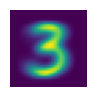

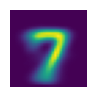

In [18]:
mean_valid_3 = valid_3_tensor.mean(0)
mean_valid_7 = valid_7_tensor.mean(0)

show_image(mean_valid_3), show_image(mean_valid_7)

In [19]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

There is a lot going on  here. a and b can potentially mismatch in size: There might be the mean 3 ([28,28]) and all of the validation set ([1010,28,28]), in which case the mean 3 is broadcast when doing abs(). For .mean(), the param is a tuple representing -1, the last axis, and -2, the second to last axis, which will leave a single dimension, which might be a scalar in the case of matching a 3 and the mean 3, or a 1 dimensional vector for all of the validation set.

First, check out the shapes of `a_3` and `mean3`.

Then try it out with the validation set.

In [20]:
a_3.shape, mean3.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [21]:
mnist_distance(valid_3_tensor, mean3)

tensor([0.1355, 0.1541, 0.1460,  ..., 0.1249, 0.1330, 0.1320])

In [22]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [23]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [24]:
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tensor) + [0] * len(valid_7_tensor)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [25]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [26]:
bias = init_params(1)

In [27]:
weights,bias

(tensor([[-1.5350e-01],
         [ 3.2365e-01],
         [-2.7276e-01],
         [-1.5815e-01],
         [ 2.0526e+00],
         [ 2.4645e-01],
         [-1.0007e+00],
         [ 4.7898e-01],
         [ 1.7207e+00],
         [ 1.2040e+00],
         [-1.3494e-01],
         [ 1.6679e+00],
         [-1.1769e-01],
         [ 1.4943e+00],
         [ 1.6669e+00],
         [ 3.4831e-01],
         [ 1.4584e+00],
         [ 4.7573e-01],
         [-6.5287e-01],
         [-7.2775e-01],
         [-1.1222e+00],
         [ 7.7884e-01],
         [-2.3622e-01],
         [-2.0088e+00],
         [-5.8048e-02],
         [ 9.4596e-01],
         [-1.1201e+00],
         [ 5.9051e-01],
         [-4.1716e-01],
         [ 3.1731e-01],
         [ 2.3057e-02],
         [ 3.0903e-01],
         [-2.3401e-01],
         [ 3.4313e-01],
         [-5.1185e-01],
         [-1.0510e+00],
         [ 2.2764e-01],
         [ 4.6305e-01],
         [-5.1258e-02],
         [ 1.4905e-01],
         [-1.8131e-01],
         [-1.231

In [28]:
(train_x[0]*weights.T).sum() + bias

tensor([-1.8145], grad_fn=<AddBackward0>)

`train_x[0]` is a row vector of 768 length and `weights` is a column vector, 768 height. Using `*` does elementwise multiply, so summing them gets us a single number. You can also do this for the same result:

In [29]:
train_x[0]@weights + bias

tensor([-1.8145], grad_fn=<AddBackward0>)

In [30]:
def linear1(xb): return xb@weights + bias

preds=linear1(train_x)
preds

tensor([[-1.8145],
        [-1.9063],
        [-1.1777],
        ...,
        [ 6.3561],
        [-5.0316],
        [-2.1795]], grad_fn=<AddBackward0>)

Again, this works because of broadcasting. xb is the tensor of all of the images in the training set. So you do matrix multiplication by the weights, and broadcast across the training set. Also, the bias is a scalar addition that broadcasts across the training set in the obvious manner.

In [31]:
corrects = (preds>0.0).float() == train_y

In [32]:
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [ True],
        [ True]])

In [33]:
corrects.float().mean().item()

0.41489189863204956

In [34]:
def sigmoid(x): return 1/(1 + torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [35]:
# Starting at Putting it all together on p 171

weights = init_params((28*28,1))
bias = init_params(1)

dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [36]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [37]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [38]:
preds = linear1(batch) # see cell 29
preds

tensor([[1.3367],
        [0.0772],
        [1.0377],
        [3.2941]], grad_fn=<AddBackward0>)

In [39]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2465, grad_fn=<MeanBackward0>)

In [40]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0232), tensor([-0.1605]))

In [41]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    
calc_grad(batch, train_y[:4], linear1)

In [42]:
weights.grad.mean(), bias.grad

(tensor(-0.0464), tensor([-0.3210]))

In [43]:
calc_grad(batch, train_y[:4], linear1)

In [44]:
weights.grad.mean(), bias.grad

(tensor(-0.0696), tensor([-0.4815]))

In [45]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [46]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()  # Here is where we zero out
            
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()  # broadcast sigmoid over xb.
    correct = (preds > 0.5) == yb  # broadcast > 0.5 over preds, then == over each of 256 in tensor.
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [47]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [48]:
validate_epoch(linear1)

0.3496

In [49]:
lr = 1.
params = weights, bias

for _ in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end="  ")

0.5214  0.6742  0.8427  0.9076  0.9301  0.9374  0.9442  0.9486  0.954  0.9569  0.9589  0.9598  0.9633  0.9647  0.9652  0.9667  0.9682  0.9696  0.9711  0.9721  

Something is wrong with ^^^, but I am going to move on. I am pretty sure it is a typo somewhere.

In [50]:
linear_model = nn.Linear(28*28,1)

w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [51]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

lr = 1.

opt = BasicOptim(linear_model.parameters(), lr)

def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [52]:
validate_epoch(linear_model)

0.2989

In [53]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = "  ")

In [54]:
train_model(linear_model, 20)

0.4932  0.8354  0.8384  0.9136  0.9331  0.9458  0.955  0.9629  0.9653  0.9672  0.9697  0.9721  0.9736  0.9746  0.9756  0.9765  0.9775  0.9785  0.9785  0.9785  

In [55]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932  0.8623  0.8374  0.9146  0.9341  0.9472  0.9565  0.9629  0.9658  0.9677  0.9692  0.9716  0.9741  0.9746  0.9761  0.9765  0.9775  0.978  0.9785  0.9785  

In [56]:
# I think something is wrong with how the validation data is being loaded in. It is the same bad result even with the Pytorch provided functions.
# Outdated. See below.

In [57]:
dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.635752,0.503026,0.495584,00:00
1,0.407830,0.271499,0.743376,00:00
2,0.154331,0.151566,0.866536,00:00
3,0.070078,0.096767,0.918057,00:00
4,0.038938,0.072876,0.935231,00:00
5,0.026678,0.059371,0.949951,00:00
6,0.021574,0.050801,0.957802,00:00
7,0.019254,0.045017,0.963690,00:00
8,0.018040,0.040903,0.965653,00:00
9,0.017286,0.037843,0.967125,00:00


In [58]:
# Yeah, definitely the validation set.

In [59]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learner = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.026134,0.030285,0.974485,00:00
1,0.023528,0.028378,0.976448,00:00
2,0.022237,0.027812,0.978901,00:00
3,0.021628,0.027614,0.978410,00:00
4,0.021345,0.027513,0.978410,00:00
5,0.021200,0.027432,0.978410,00:00
6,0.021105,0.027350,0.977920,00:00
7,0.021025,0.027264,0.977920,00:00
8,0.020946,0.027176,0.977920,00:00
9,0.020867,0.027087,0.977920,00:00


In [60]:
# Ok, I went back and looked at the mean valid 3 and mean valid 7, turns out I was pulling in 3 for both of them. So of course validation failed. I changed it to the correct path and now it works.